In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import csv
import pprint as pprint
import glob
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import datetime

import matplotlib.pylab as pl
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import date2num
from matplotlib.dates import strpdate2num
from scipy.stats import ks_2samp
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from matplotlib.ticker import AutoMinorLocator

%matplotlib inline

def read_csv(filename, names):
    df = pd.read_csv(filename, 
        delimiter='\t',
        names=names,
        quoting=csv.QUOTE_NONE)
    return df

def normalise_total(df, y):
    total = df[y].sum()
    df[y] = df[y] / total
    return df

def convert_to_percentage(df, y):
    df[y] *= 100
    return df

def plot_lines(dfs,  
               df_x, df_y,
               label_x, label_y, 
               word_legend, 
               title=None,
               y_min=None, y_max=None, 
               set_x_label = True, set_y_label = True, has_legend = True,
               linewidth=1.5, loc="upper left", bbox_to_anchor=(1, 1), filename=None, colours=None,
              vertical_lines=None, alpha=1, is_week=False, show_grid=False, is_day=False, is_date=False): 
        fig, ax = plt.subplots()
        
        if title != None:
            plt.title(title)        
        if set_x_label:
            plt.xlabel(label_x)
        if set_y_label:
            ax.set_ylabel(label_y)
#             ax.get_yaxis().set_label_coords(-0.1, 1)
        if colours == None:
            colours = cm.jet(np.linspace(0, 1, len(dfs)))
        
        for df, c in zip(dfs, colours):
            ax.plot(df[df_x], df[df_y], color=c, linewidth=linewidth, alpha=alpha)
          
        if is_day:
            ax.xaxis.set_minor_locator(AutoMinorLocator(6))
            plt.xticks(np.arange(0, 25, 6))
        
        if is_week:
            ax.xaxis.set_minor_locator(AutoMinorLocator(4))
            plt.xticks(np.arange(0, 169, 24))
        
        if has_legend:
            ax.legend(word_legend, loc=loc, bbox_to_anchor=bbox_to_anchor)
            leg = ax.get_legend()
            for i, c in enumerate(colours):
                leg.legendHandles[i].set_color(c)
        
        if vertical_lines != None:
            for date in vertical_lines:
                plt.axvline(datetime.datetime(date['year'], date['month'], date['day']),
                           color='black', linewidth=linewidth, linestyle='--', alpha=0.5)
    
        if show_grid:
            plt.grid()

#         plt.setp(ax.get_xticklabels(), visible=False)

#         plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
        if is_date:
            plt.gcf().autofmt_xdate()
        
        if y_min != None and y_max != None:
            plt.ylim(y_min, y_max)
        elif y_min != None:
            plt.ylim(bottom=y_min)
        elif y_max != None:
            ax.set_ylim(top=y_max)

#         ax.margins(x=0.01)
        if filename != None:
            fig.savefig(filename, bbox_inches='tight')
        plt.show()  
        
def plot_hist(df,
              df_x, df_y, 
              label_x=None, label_y=None,
              title=None,
              y_min=None, y_max=None, x_min=None, x_max=None, filename=None):
    plt.hist(df[df_x], df[df_y])
    
    if x_min != None and x_max != None:
        plt.xlim(left=x_min, right=x_max)
    elif x_min != None:
        plt.xlim(left=x_min)
    elif x_max != None:
        plt.xlim(right=x_max)
        
    if label_y != None:
        plt.ylabel(label_y)
    if label_x != None:
        plt.xlabel(label_x)
    if title != None:
        plt.title(title)
    plt.tight_layout()
    if filename != None:
        fig = plt.gcf()
        fig.savefig(filename, bbox_inches='tight')
        
    plt.show()
        
def plot_bar(df,  
              df_x, df_y, 
              label_x=None, label_y=None,
              title=None,
              y_min=None, y_max=None, x_min=None, x_max=None, filename=None, is_week=False, colour='C0', show_grid=False):
    plt.bar(df[df_x], df[df_y], color=colour)
    
    if x_min != None and x_max != None:
        plt.xlim(left=x_min, right=x_max)
    elif x_min != None:
        plt.xlim(left=x_min)
    elif x_max != None:
        plt.xlim(right=x_max)
 
    if y_min != None and y_max != None:
        plt.ylim(bottom=y_min, top=y_max)
    elif y_min != None:
        plt.ylim(bottom=y_min)
    elif y_max != None:
        plt.ylim(top=y_max)
        
    if show_grid:
        plt.grid()
        
    if label_y != None:
        plt.ylabel(label_y)
    if label_x != None:
        plt.xlabel(label_x)
    if title != None:
        plt.title(title)
    plt.tight_layout()
    if filename != None:
        fig = plt.gcf()
        fig.savefig(filename, bbox_inches='tight')
        
    plt.show()
    
def plot_line(df,  
              df_x, df_y, 
              label_x=None, label_y=None,
              title=None,
              y_min=None, y_max=None, x_min=None, x_max=None, filename=None, is_week=False, show_grid=False):
    fig, ax = plt.subplots()
    plt.plot(df[df_x], df[df_y])

    if x_min != None and x_max != None:
        plt.xlim(left=x_min, right=x_max)
    elif x_min != None:
        plt.xlim(left=x_min)
    elif x_max != None:
        plt.xlim(right=x_max)
    
    if show_grid:
        plt.grid()
    
    if is_week:
        ax.xaxis.set_minor_locator(AutoMinorLocator(4))
        plt.xticks(np.arange(0, 169, 24))
    
    if label_y != None:
        plt.ylabel(label_y)
    if label_x != None:
        plt.xlabel(label_x)
    if title != None:
        plt.title(title)
    plt.tight_layout()
    if filename != None:
        fig = plt.gcf()
        fig.savefig(filename, bbox_inches='tight')
        
    plt.show()
    
def plot_cdf_double(df_one, df_two, 
                    df_y,
                    label_x,
                    legend, colours=['red', 'blue'],
                    title=None,
                    log_scale=False,
                    y_min=None, y_max=None, filename=None, is_day=False, is_week=False, alpha=1, x_min=None, x_max=None):
    fig, ax = plt.subplots()
    
    df_one_y = df_one.sort_values(df_y)[df_y].tolist()
    yvals = np.arange(len(df_one_y))/float(len(df_one_y)-1)
    ax.plot(df_one_y, yvals, color=colours[0], alpha=alpha)
    
    df_two_y = df_two.sort_values(df_y)[df_y].tolist()   
    yvals = np.arange(len(df_two_y))/float(len(df_two_y)-1)
    ax.plot(df_two_y, yvals, color=colours[1], alpha=alpha)
    ax.legend(legend, loc="lower right")
    leg = ax.get_legend()
    leg.legendHandles[0].set_color(colours[0])
    leg.legendHandles[1].set_color(colours[1])
    
    if is_day:
        ax.xaxis.set_minor_locator(AutoMinorLocator(6))
        plt.xticks(np.arange(0, 25, 6))
    
    if is_week:
        ax.xaxis.set_minor_locator(AutoMinorLocator(4))
        plt.xticks(np.arange(0, 169, 24))
    
    if (log_scale):
        ax.set_xscale("log")
        
    if title != None:
        ax.set_title(title)
    plt.xlabel(label_x)
    plt.ylabel('CDF')
    plt.grid()
    
    if y_min != None and y_max != None:
        plt.ylim(y_min, y_max)
    elif y_min != None:
        plt.ylim(bottom=y_min)
    elif y_max != None:
        plt.ylim(top=y_max)
        
    if x_min != None and x_max != None:
        plt.xlim(x_min, x_max)
    elif x_min != None:
        plt.xlim(left=x_min)
    elif x_max != None:
        plt.xlim(right=x_max)
    
    if filename != None:
        fig.savefig(filename, bbox_inches='tight')
    plt.show()

gamedurationsbyregion_ranked_rich_english


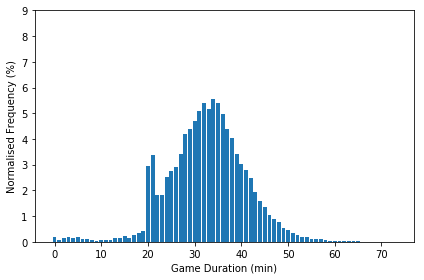

gamedurationsbyregion_ranked_poor_nonenglish


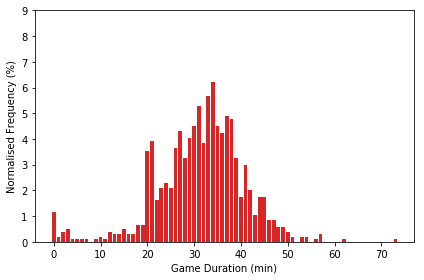

gamedurationsbyregion_unranked_rich_english


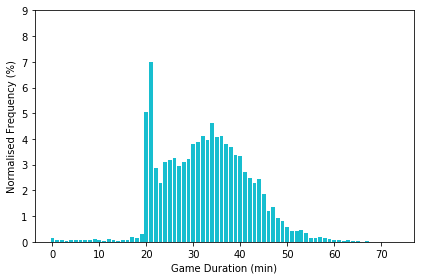

gamedurationsbyregion_unranked_poor_nonenglish


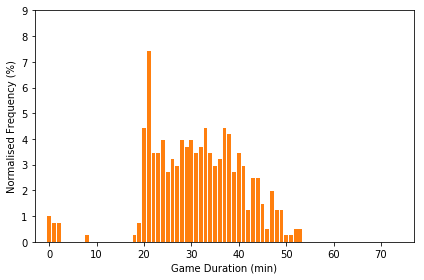

In [18]:
# GAME DURATION BY REGION HISTOGRAM
filenames = ['gamedurationsbyregion_ranked_rich_english',
'gamedurationsbyregion_ranked_poor_nonenglish',
'gamedurationsbyregion_unranked_rich_english',
'gamedurationsbyregion_unranked_poor_nonenglish']

df_x = 'x'
df_y = 'y'
col_names = [df_x, df_y]
df1 = read_csv(filenames[0], col_names)
# df1 = normalise_total(df1, df_y)
# df1 = df1.sort_values(df_y, ascending=False)

df2 = read_csv(filenames[1], col_names)
# df2 = normalise_total(df2, df_y)
# df2 = df2.sort_values(df_y, ascending=False)

df3 = read_csv(filenames[2], col_names)
# df3 = normalise_total(df3, df_y)
# df3 = df3.sort_values(df_y, ascending=False)

df4 = read_csv(filenames[3], col_names)
# df4 = normalise_total(df4, df_y)
# df4 = df4.sort_values(df_y, ascending=False)

# print(filenames[0], 'vs', filenames[1])
# print(ks_2samp(df1[df_y].tolist(), df2[df_y].tolist()), '\n')
# print(filenames[0], 'vs', filenames[2])
# print(ks_2samp(df1[df_y].tolist(), df3[df_y].tolist()), '\n')
# print(filenames[1], 'vs', filenames[3])
# print(ks_2samp(df2[df_y].tolist(), df4[df_y].tolist()), '\n')
# print(filenames[2], 'vs', filenames[3])
# print(ks_2samp(df3[df_y].tolist(), df4[df_y].tolist()), '\n')

colours = ['tab:blue', 'tab:red', 'tab:cyan', 'tab:orange']

for i, f in enumerate(filenames):
    df = read_csv(f, col_names)
    df = normalise_total(df, df_y)
    df[df_y] *= 100
    print(f)
    plot_bar(df, df_x, df_y, label_x='Game Duration (min)', label_y='Normalised Frequency (%)', x_max=77, y_min=0, y_max=9, 
             colour=colours[i], filename=f+".svg")

gamedurationsbyregion_ranked_rich_english
n = 17294
median = 33.0
mean = 32.56135075748815
min = 0
max = 77
stddev = 8.372875080637467 

gamedurationsbyregion_ranked_poor_nonenglish
n = 1043
median = 32.0
mean = 31.417066155321187
min = 0
max = 73
stddev = 9.315723413061965 

gamedurationsbyregion_unranked_rich_english
n = 6701
median = 33.0
mean = 32.565885688703176
min = 0
max = 67
stddev = 9.134779866217238 

gamedurationsbyregion_unranked_poor_nonenglish
n = 405
median = 31.0
mean = 31.296296296296298
min = 0
max = 53
stddev = 9.64986590534808 

gamedurationsbyregion_ranked_rich_english vs gamedurationsbyregion_ranked_poor_nonenglish
Ks_2sampResult(statistic=0.05072725137797948, pvalue=0.012163782445198513) 



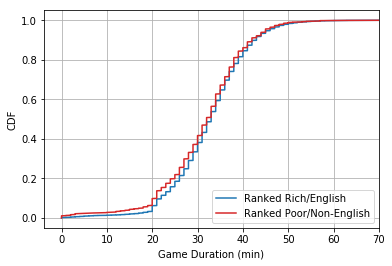

gamedurationsbyregion_ranked_rich_english vs gamedurationsbyregion_unranked_rich_english
Ks_2sampResult(statistic=0.07204760868367277, pvalue=2.813774137877566e-22) 



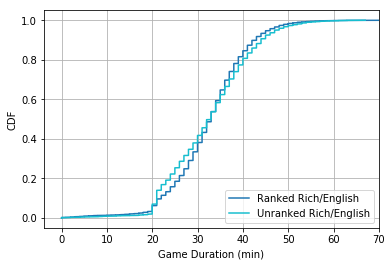

gamedurationsbyregion_ranked_poor_nonenglish vs gamedurationsbyregion_unranked_poor_nonenglish
Ks_2sampResult(statistic=0.07179906016595053, pvalue=0.0944787040772189) 



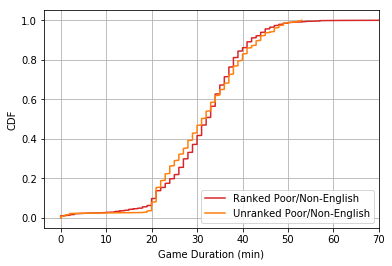

gamedurationsbyregion_unranked_rich_english vs gamedurationsbyregion_unranked_poor_nonenglish
Ks_2sampResult(statistic=0.05188464592533637, pvalue=0.24868554163609807) 



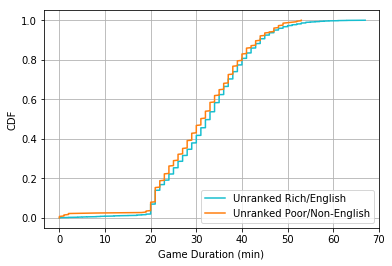

In [13]:
filenames = ['gamedurationsbyregion_ranked_rich_english',
'gamedurationsbyregion_ranked_poor_nonenglish',
'gamedurationsbyregion_unranked_rich_english',
'gamedurationsbyregion_unranked_poor_nonenglish']

def duplicate_by_frequency(df, df_x, df_y):
    dup_df = df.x.repeat(df.y).reset_index(drop=True).to_frame()
    dup_df.columns = [df_x]
    return dup_df

df_x = 'x'
df_y = 'y'
col_names = [df_x, df_y]

legend = ['Ranked Rich/English', 'Ranked Poor/Non-English', 'Unranked Rich/English', 'Unranked Poor/Non-English']
colours = ['tab:blue', 'tab:red', 'tab:cyan', 'tab:orange']
comparisons = [[0, 1], [0, 2], [1, 3], [2, 3]]

# descriptive statistics
for f in filenames:
    df = read_csv(f, col_names)
    freq = duplicate_by_frequency(df, df_x, df_y)
    print(f)
    print('n =', freq.shape[0])
    print('median =', freq[df_x].median())
    print('mean =', freq[df_x].mean())
    print('min =', freq[df_x].min())
    print('max =', freq[df_x].max())
    print('stddev =', freq[df_x].std(), '\n')

for i, c in enumerate(comparisons):
    c0 = c[0]
    c1 = c[1]
    
    df1 = read_csv(filenames[c0], col_names)
    df1 = duplicate_by_frequency(df1, df_x, df_y)
    
    df2 = read_csv(filenames[c1], col_names)
    df2 = duplicate_by_frequency(df2, df_x, df_y)
    
    f = filenames[c0] + ' vs ' + filenames[c1]
    print(f)
    print(ks_2samp(df1[df_x].tolist(), df2[df_x].tolist()), '\n')
    plot_cdf_double(df1, df2, df_x, 'Game Duration (min)', [legend[c0], legend[c1]], colours=[colours[c0], colours[c1]], filename=f+".svg", x_max=70)

In [ ]:
# GAME DURATION BY REGION CDFs


gametimesbyregion_NA
gametimesbyregion_SA
gametimesbyregion_NA vs gametimesbyregion_SA
n = 17112
n = 2147
Ks_2sampResult(statistic=0.05800179882863832, pvalue=4.95833392323431e-06) 



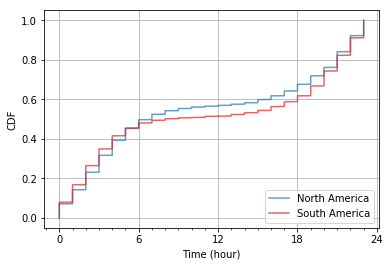

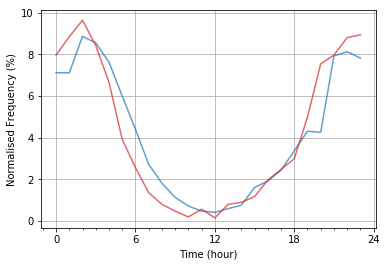

In [14]:
# GAME TIMES BY REGION HISTOGRAM

filenames = ['gametimesbyregion_NA', 'gametimesbyregion_SA']

df_x = 'x'
df_y = 'y'
col_names = [df_x, df_y]
dfs = []

for f in filenames:
    df = read_csv(f, col_names)
    print(f)
    dfs.append(df)
df0 = duplicate_by_frequency(dfs[0], df_x, df_y)
df1 = duplicate_by_frequency(dfs[1], df_x, df_y)
    
f = filenames[0] + ' vs ' + filenames[1]
print(f)
print('n =', df0.shape[0])
print('n =', df1.shape[0])
print(ks_2samp(df0[df_x].tolist(), df1[df_x].tolist()), '\n')
plot_cdf_double(df0, df1, df_x, 'Time (hour)', ['North America', 'South America'], colours=['tab:blue','tab:red'], is_day=True, alpha=0.7, filename=f+"_CDF.svg")

dfs[0] = normalise_total(dfs[0], df_y)
dfs[0][df_y] *= 100
dfs[1] = normalise_total(dfs[1], df_y)
dfs[1][df_y] *= 100
plot_lines(dfs, df_x, df_y, word_legend=['North America', 'South America'], label_x='Time (hour)', label_y='Normalised Frequency (%)', 
           colours=['tab:blue', 'tab:red'], show_grid=True, is_day=True, alpha=0.7, filename=f+".svg", has_legend=False)

gametimesbyregionbyday_NA
gametimesbyregionbyday_SA
gametimesbyregionbyday_NA vs gametimesbyregionbyday_SA
n = 17050
n = 2130
Ks_2sampResult(statistic=0.026740737681219318, pvalue=0.1312955336743932) 



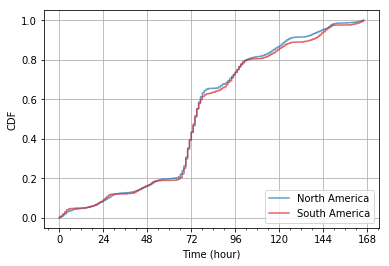

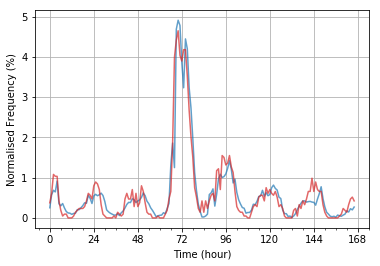

In [15]:
# GAME TIMES BY REGION BY DAY HISTOGRAM

filenames = ['gametimesbyregionbyday_NA', 'gametimesbyregionbyday_SA']

df_x = 'x'
df_y = 'y'
col_names = [df_x, df_y]
dfs = []

for f in filenames:
    df = read_csv(f, col_names)
    df = df.sort_values(by=df_x)
    
    # fill missing values
    df = df.set_index(df_x)
    df = df.reindex(np.arange(0, 167, 1), fill_value=0)
    df = df.reset_index()
    print(f)
    
    dfs.append(df)

df0 = duplicate_by_frequency(dfs[0], df_x, df_y)
df1 = duplicate_by_frequency(dfs[1], df_x, df_y)

f = filenames[0] + ' vs ' + filenames[1]
print(f)
print('n =', df0.shape[0])
print('n =', df1.shape[0])
print(ks_2samp(df0[df_x].tolist(), df1[df_x].tolist()), '\n')
plot_cdf_double(df0, df1, df_x, 'Time (hour)', ['North America', 'South America'], colours=['tab:blue','tab:red'], is_week=True, alpha=0.7, filename=f+"_CDF.svg")

dfs[0] = normalise_total(dfs[0], df_y)
dfs[0][df_y] *= 100
dfs[1] = normalise_total(dfs[1], df_y)
dfs[1][df_y] *= 100
plot_lines(dfs, df_x, df_y, word_legend=['North America', 'South America'], label_x='Time (hour)', label_y='Normalised Frequency (%)', 
           colours=['tab:blue', 'tab:red'], show_grid=True, is_week=True, alpha=0.7, filename=f+".svg", has_legend=False)

In [19]:
# SPLIT CHAMPIONS BY DAY BY REGION INTO SEPARATE FILES, EACH CONTAINING DATE FREQ 
# FOR A SPECIFIC CHAMPION
filenames = ['championsbydaybyregion_ranked_poor_nonenglish',
'championsbydaybyregion_ranked_rich_english',
'championsbydaybyregion_unranked_poor_nonenglish',
'championsbydaybyregion_unranked_rich_english']

df_date = 'date'
df_champion = 'champion'
df_freq = 'freq' 
col_names = [df_date, df_champion, df_freq]

champion_ids = set()

for f in filenames:
    df = read_csv(f, col_names)
    print(df[df_freq].sum())
#     champion_ids = champion_ids.union(set(df[df_champion].unique().tolist()))

# champion_ids = list(champion_ids)
# print(champion_ids)
# folder_name = 'championsbydaybyregion/'

# for f in filenames:
#     df = read_csv(f, col_names)
#     total = df.groupby(df_date).sum()
#     df['normalised freq'] = df.freq.div(df.date.map(total.freq))
    
#     for c_id in champion_ids:
#         output_fn = folder_name + f + '_' + str(c_id)
#         champion_df = df.loc[df[df_champion] == c_id]
#         champion_df = champion_df[[df_date, 'normalised freq']]
#         champion_df.to_csv(output_fn, sep='\t', encoding='utf-8', header=False, index=False)

324980
5281580
93180
2392880


['Annie', 'Olaf', 'Galio', 'Twisted Fate', 'Xin Zhao', 'Urgot', 'LeBlanc', 'Vladimir', 'Fiddlesticks', 'Kayle', 'Master Yi', 'Alistar', 'Ryze', 'Sion', 'Sivir', 'Soraka', 'Teemo', 'Tristana', 'Warwick', 'Nunu', 'Miss Fortune', 'Ashe', 'Tryndamere', 'Jax', 'Morgana', 'Zilean', 'Singed', 'Evelynn', 'Twitch', 'Karthus', 'Chogath', 'Amumu', 'Rammus', 'Anivia', 'Shaco', 'Dr.Mundo', 'Sona', 'Kassadin', 'Irelia', 'Janna', 'Gangplank', 'Corki', 'Karma', 'Taric', 'Veigar', 'Trundle', 'Swain', 'Caitlyn', 'Blitzcrank', 'Malphite', 'Katarina', 'Nocturne', 'Maokai', 'Renekton', 'Jarvan IV', 'Elise', 'Orianna', 'Wukong', 'Brand', 'Lee Sin', 'Vayne', 'Rumble', 'Cassiopeia', 'Skarner', 'Heimerdinger', 'Nasus', 'Nidalee', 'Udyr', 'Poppy', 'Gragas', 'Pantheon', 'Ezreal', 'Mordekaiser', 'Yorick', 'Akali', 'Kennen', 'Garen', 'Leona', 'Malzahar', 'Talon', 'Riven', "Kog'Maw", 'Shen', 'Lux', 'Xerath', 'Shyvana', 'Ahri', 'Graves', 'Fizz', 'Volibear', 'Rengar', 'Varus', 'Nautitus', 'Viktor', 'Sejuani', 'Fiora'

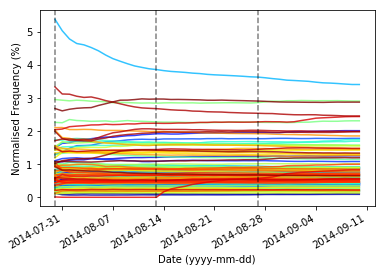

championsbydaybyregion_unranked_poor_nonenglish


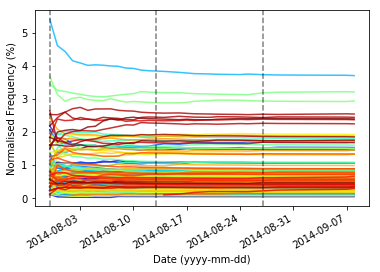

championsbydaybyregion_ranked_rich_english


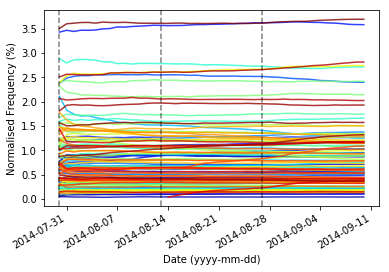

championsbydaybyregion_ranked_poor_nonenglish


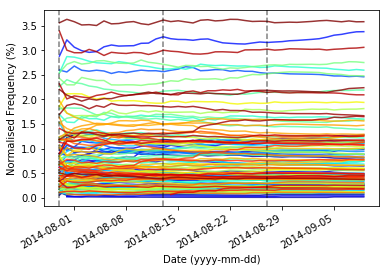

In [17]:
from os.path import isfile

# CHAMPIONS BY DAY BY REGION
filenames = ['championsbydaybyregion_unranked_rich_english', 
             'championsbydaybyregion_unranked_poor_nonenglish',
             'championsbydaybyregion_ranked_rich_english',
    'championsbydaybyregion_ranked_poor_nonenglish']

all_champion_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 96, 98, 99, 101, 102, 103, 104, 105, 106, 107, 110, 111, 112, 113, 114, 115, 117, 119, 120, 121, 122, 126, 127, 131, 133, 134, 143, 150, 154, 157, 161, 201, 222, 236, 238, 254, 266, 267, 412]
all_champion_ids = list(map(str, all_champion_ids))
champion_map = {"1":"Annie", "2":"Olaf", "3":"Galio", "4":"Twisted Fate", "5":"Xin Zhao", "6":"Urgot", "7":"LeBlanc", "8":"Vladimir", "9":"Fiddlesticks", "10":"Kayle", "11":"Master Yi", "12":"Alistar", "13":"Ryze", "14":"Sion", "15":"Sivir", "16":"Soraka", "17":"Teemo", "18":"Tristana", "19":"Warwick", "20":"Nunu", "21":"Miss Fortune", "22":"Ashe", "23":"Tryndamere", "24":"Jax", "25":"Morgana", "26":"Zilean", "27":"Singed", "28":"Evelynn", "29":"Twitch", "30":"Karthus", "31":"Chogath", "32":"Amumu", "33":"Rammus", "34":"Anivia", "35":"Shaco", "36":"Dr.Mundo", "37":"Sona", "38":"Kassadin", "39":"Irelia", "40":"Janna", "41":"Gangplank", "42":"Corki", "43":"Karma", "44":"Taric", "45":"Veigar", "48":"Trundle", "50":"Swain", "51":"Caitlyn", "53":"Blitzcrank", "54":"Malphite", "55":"Katarina", "56":"Nocturne", "57":"Maokai", "58":"Renekton", "59":"Jarvan IV", "60":"Elise", "61":"Orianna", "62":"Wukong", "63":"Brand", "64":"Lee Sin", "67":"Vayne", "68":"Rumble", "69":"Cassiopeia", "72":"Skarner", "74":"Heimerdinger", "75":"Nasus", "76":"Nidalee", "77":"Udyr", "78":"Poppy", "79":"Gragas", "80":"Pantheon", "81":"Ezreal", "82":"Mordekaiser", "83":"Yorick", "84":"Akali", "85":"Kennen", "86":"Garen", "89":"Leona", "90":"Malzahar", "91":"Talon", "92":"Riven", "96":"Kog'Maw", "98":"Shen", "99":"Lux", "101":"Xerath", "102":"Shyvana", "103":"Ahri", "104":"Graves", "105":"Fizz", "106":"Volibear", "107":"Rengar", "110":"Varus", "111":"Nautitus", "112":"Viktor", "113":"Sejuani", "114":"Fiora", "115":"Ziggs", "117":"Lulu", "119":"Draven", "120":"Hecarim", "121":"Kha'Zix", "122":"Darius", "126":"Jayce", "127":"Lissandra", "131":"Diana", "133":"Quinn", "134":"Syndra", "143":"Zyra", "150":"Gnar", "154":"Zac", "157":"Yasuo", "161":"Vel'Koz", "201":"Braum", "222":"Jinx", "236":"Lucian", "238":"Zed", "254":"Vi", "266":"Aatrox", "267":"Nami", "412":"Thresh"}

df_x = 'x'
df_y = 'y'
col_names = [df_x, df_y]
folder_name = 'championsbydaybyregion/'

partitions = 1
partitioned_champion_ids = list(map(list, np.array_split(all_champion_ids, partitions)))
partitioned_champion_names = [[champion_map[c_id] for c_id in partition] for partition in partitioned_champion_ids]

has_legend = [True] + [False] * (len(filenames) - 1)
# http://leagueoflegends.wikia.com/wiki/Patch
vertical_lines = [{'year':2014, 'month':7, 'day':30},
                 {'year':2014, 'month':8, 'day':13},
                 {'year':2014, 'month':8, 'day':27}]
#                  {'year':2014, 'month':9, 'day':10}]

for i, partition in enumerate(partitioned_champion_ids):
    print(partitioned_champion_names[i], '\n')
    for j, f in enumerate(filenames):
        dfs = []
        champion_ids = set()
        print(f)
        for c_id in partition:
            df_fn = folder_name + f + '_' + c_id
            if isfile(df_fn):
                df = read_csv(df_fn, col_names)
                df[df_y] *= 100
                df[df_x] = pd.to_datetime(df[df_x])
                champion_ids.add(c_id)
                dfs.append(df)

        champion_ids = sorted(list(champion_ids))
        plot_lines(dfs, df_x, df_y, 'Date (yyyy-mm-dd)', 'Normalised Frequency (%)', 
                   partitioned_champion_names[i], has_legend=False, 
                  vertical_lines=vertical_lines, alpha=0.8, is_date=True, filename=f+".svg")